# Functionality Imports

In [1]:
from sys import path
path.append("/home/jovyan/work/tcpexpert/jupyter/shared")

from postgres_db import create_table_v2 as create_table, create_db as create_db
from cp_get_crypto import get_crypto as ccxt
from trends import SMA, MACD, EMA
from cp_get_vwap import vwap
from cp_get_supertrend import supertrend
from cp_get_ssl import SSLChannels, CCI, MFI, CCIMFI, Upper_Lower_OHLC

# Collect OHLC Data 

In [2]:
symbol = "ETC/USD"
# symbol = "ETC/USD"
# symbol = "ETC/USD"

In [3]:
df = ccxt(symbol, interval="30m", limit=2000)
df

,Open,High,Low,Close,Volume,exchange,symbol,interval,time
date,,,,,,,,,
2022-01-26 21:30:00+00:00,24.280,24.280,23.702,23.702,245.874112,kraken,ETC/USD,30m,2022-01-26 21:30:00+00:00
2022-01-26 22:00:00+00:00,23.646,23.831,23.646,23.831,243.455295,kraken,ETC/USD,30m,2022-01-26 22:00:00+00:00
2022-01-26 22:30:00+00:00,23.824,24.126,23.824,24.126,30.848362,kraken,ETC/USD,30m,2022-01-26 22:30:00+00:00
2022-01-26 23:00:00+00:00,24.104,24.561,24.104,24.519,1579.305881,kraken,ETC/USD,30m,2022-01-26 23:00:00+00:00
2022-01-26 23:30:00+00:00,24.455,24.455,24.295,24.295,15.353675,kraken,ETC/USD,30m,2022-01-26 23:30:00+00:00
...,...,...,...,...,...,...,...,...,...
2022-02-10 19:00:00+00:00,35.258,35.258,34.959,35.128,317.486646,kraken,ETC/USD,30m,2022-02-10 19:00:00+00:00
2022-02-10 19:30:00+00:00,35.126,35.126,34.884,34.923,142.176855,kraken,ETC/USD,30m,2022-02-10 19:30:00+00:00
2022-02-10 20:00:00+00:00,34.905,35.138,34.822,34.840,2626.346146,kraken,ETC/USD,30m,2022-02-10 20:00:00+00:00


In [4]:
df = Upper_Lower_OHLC(df)

# Indicators & Calculations

## VWAP

In [5]:
df = vwap(df,"time")

### Simple Moving Average

In [6]:
df = SMA(df, "vwap")

### MACD

In [7]:
df = MACD(df, "vwap")

## Closing Price Averages

In [8]:
df = SMA(df, "Close")

## Momentum Indicators

### CCI & MFI

> The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

> The Commodity Channel Index​ (CCI) is a momentum-based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold.

> Developed by Donald Lambert, this technical indicator assesses price trend direction and strength, allowing traders to determine if they want to enter or exit a trade, refrain from taking a trade, or add to an existing position. In this way, the indicator can be used to provide trade signals when it acts in a certain way.

In [9]:
df = CCI(df, 7)
df = MFI(df, 7)

### CCI + MFI Fusion

In [10]:
df = CCIMFI(df)

# Generate Buy/Sell Signals

## Trend Identification (Buy/Sell Signals)

### SuperTrend

In [11]:
df = supertrend(df)

> Supertrend is a trend-following indicator based on Average True Range (ATR). The calculation of its single line combines trend detection and volatility. It can be used to detect changes in trend direction and to position stops.

### SSL Channels

In [12]:
df = SSLChannels(df, 7)

> The SSL Trend channel is a very popular trend indicator. It comes from the forex world where it's used by many traders. The indicator plots a channel that is based on 2 moving averages. The first moving average is using the high of each candle and the second moving average is using the low of each candle.
> By using the low & high of the candles as a base for our moving average we get a trend channel that allows you to quickly recognize the trend and get into the trend easily.

# Forecasting

In [13]:
df["time"] = df["time"].dt.tz_localize(None)

## VWAP MACD 

Importing plotly failed. Interactive plots will not work.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


Initial log joint probability = -38.4725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       312.315    6.7689e-08       423.248      0.2627           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       312.315   7.31241e-09        480.16      0.2377      0.2377      136   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


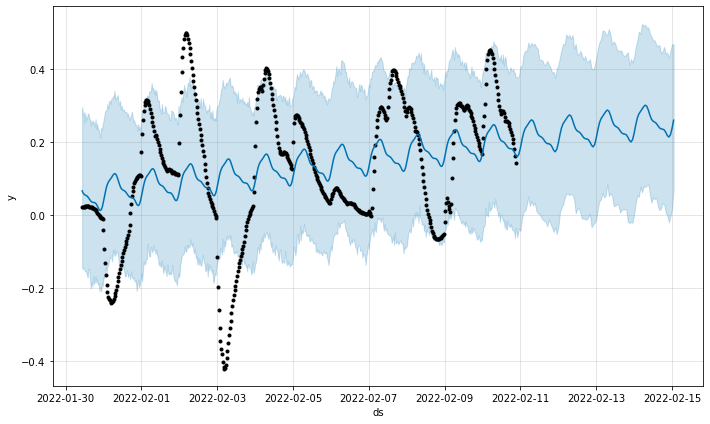

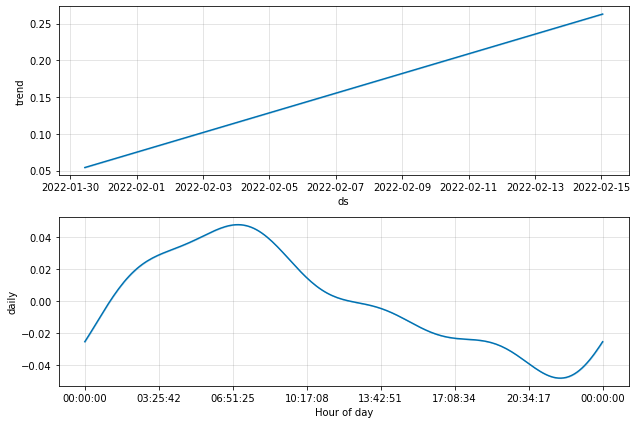

In [14]:
from forecast import debug_v2 as prophet

ds = df["time"]
y = df["vwap_macd"]
forecast_periods = 100
lookback_periods = 550

forecast = prophet(df, ds, y, forecast_periods, lookback_periods)
forecast_results = forecast[["ds", "yhat", "trend"]]

# Filtering Buy/Sell Signals

In [15]:
# ssl channels + cci_mfi

df.loc[
    (
        (df["ssl_buy"] == 1) &
        (df["vwap_macd"] < 0.01) &
        (df["cci_mfi"] > 141)
    ),
    "buy"] = 1

df.loc[
    (
        (df["ssl_sell"] == 1) & 
        (df["cci_mfi"] < -175)
    ),
    "sell"] = 1

In [16]:
# supertrend + cci_mfi

df.loc[
    (
        (df["st_buy"] == 1) &
        (df["vwap_macd"] < 0.01) &
        (df["cci_mfi"] > 169)
    ),
    "buy"] = 1

df.loc[
    (
        (df["st_sell"] == 1) & 
        (df["cci_mfi"] < -175)
    ),
    "sell"] = 1

# Send to postgresdb

In [17]:
create_db("stocks")
create_table(df, "stocks", "ohlc")
create_table(forecast, "stocks", "prophet")

# Visualize in Grafana